### Employee Turnover Analytics
#### Problem Statement
Project Statement:
Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.
Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.
The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.

### Objective:
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.

### Feature Description:
1. **satisfaction_level**:  Satisfaction level at the job of an employee
2. **last_evaluation**: Rating between 0 and 1, received by an employee at his last evaluation
3. **number_project**: The number of projects an employee is involved in 
4. **average_montly_hours**: Average number of hours in a month spent by an employee at the office
5. **time_spend_company**: Number of years spent in the company
6. **Work_accident**:0 - no accident during employee stay, 1 - accident during employee stay
7. **left**:0 indicates an employee stays with the company and  1 indicates an employee left the company
8. **promotion_last_5years**: Number of promotions in his stay
9. **Department**: Department to which an employee belongs to
10. **salary**: Salary in USD

In [109]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, RocCurveDisplay


In [ ]:
df = pd.read_csv('1722506184_hr_comma_sep\HR_comma_sep.csv')

#### Step 1: Performing Data Quality Check(Data Cleaning)

In [111]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [113]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [114]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Step 2: Understand what factors contributed most to employee turnover at EDA.
- 2.1.Draw a heatmap of the correlation matrix between all numerical features or columns in the data.
- 2.2.Draw the distribution plot of:
    - Employee Satisfaction (use column satisfaction_level)
    - Employee Evaluation (use column last_evaluation)
    - Employee Average Monthly Hours (use column average_montly_hours)
- 2.3.Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue column left), and give your inferences from the plot.

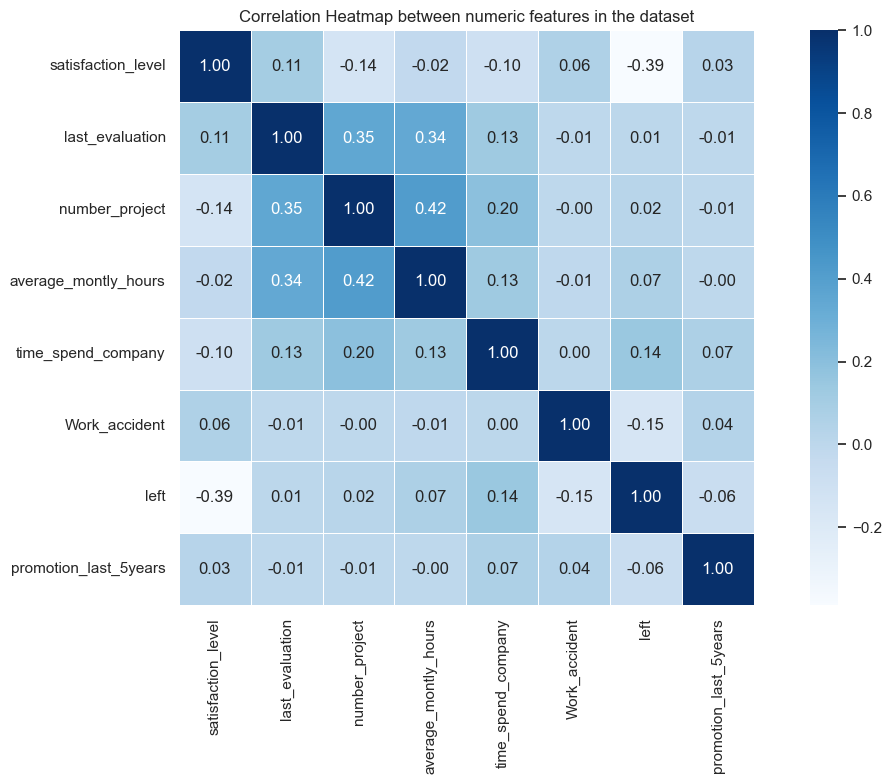

In [115]:
#### 2.1 heatmap of the correlation matrix between all numerical features or columns in the data

plt.figure(figsize=(12,8))
corr_matrix = df.corr(numeric_only=True)  # in newer pandas versions
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", square=True, linewidths=.5)
plt.title("Correlation Heatmap between numeric features in the dataset")
plt.tight_layout()
plt.show()

#### Inference from heatmap of numerical features:
- satisfaction_level has the strongest (negative) correlation with attrition (left = -0.39).dissatisfied employees are more likely to leave.
- attrition: gradual reduction in the number of employees over time - especially when people leave a company and are not replaced
- number_project and average_monthly_hours are moderately correlated with each other (0.42) displaying overloaded employees
BusinessInterpretation:
- Portobello Tech should focus on boosting satisfaction (employee engagement, culture, workload balance)
- Employees who have not been promoted + high time in company may be flagged for intervention


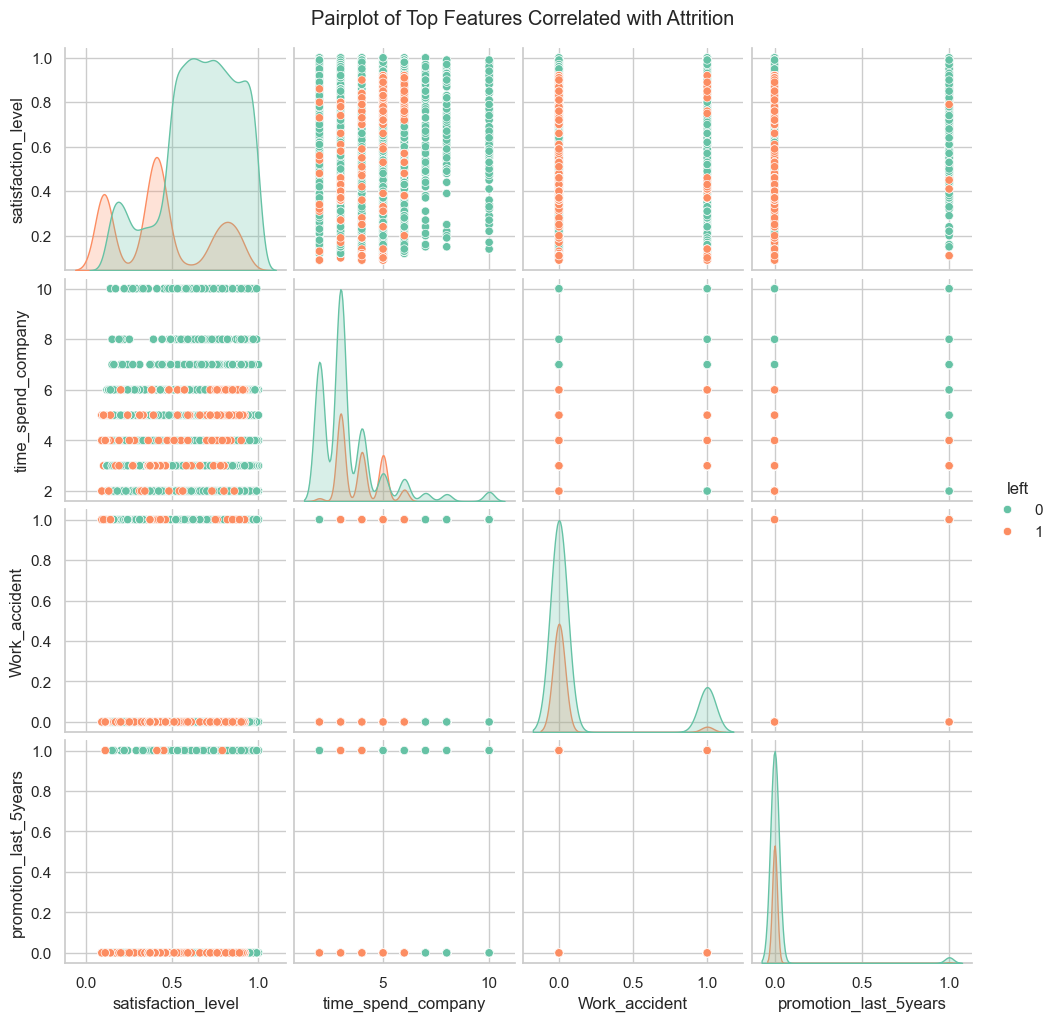

In [ ]:
# genrating paiplot for top correlated features:
top_features = ['satisfaction_level', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']
sns.pairplot(df[top_features], hue="left", palette="Set2", diag_kind="kde")
plt.suptitle("Pairplot of Top Features Correlated with Attrition", y=1.02)
# y = 1.02,  to adjust the position of the title vertically above the entire pairplot grid.
plt.show()


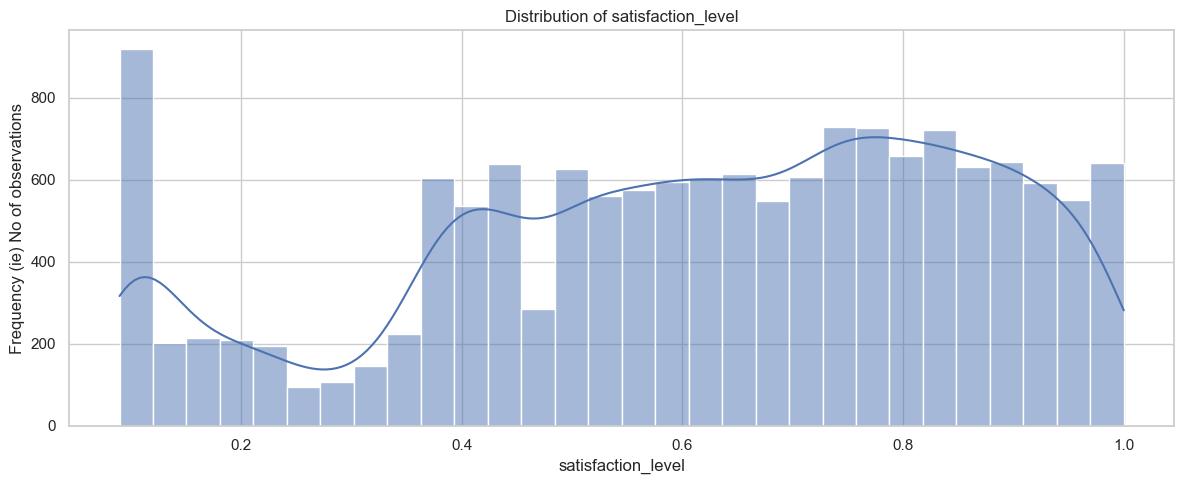

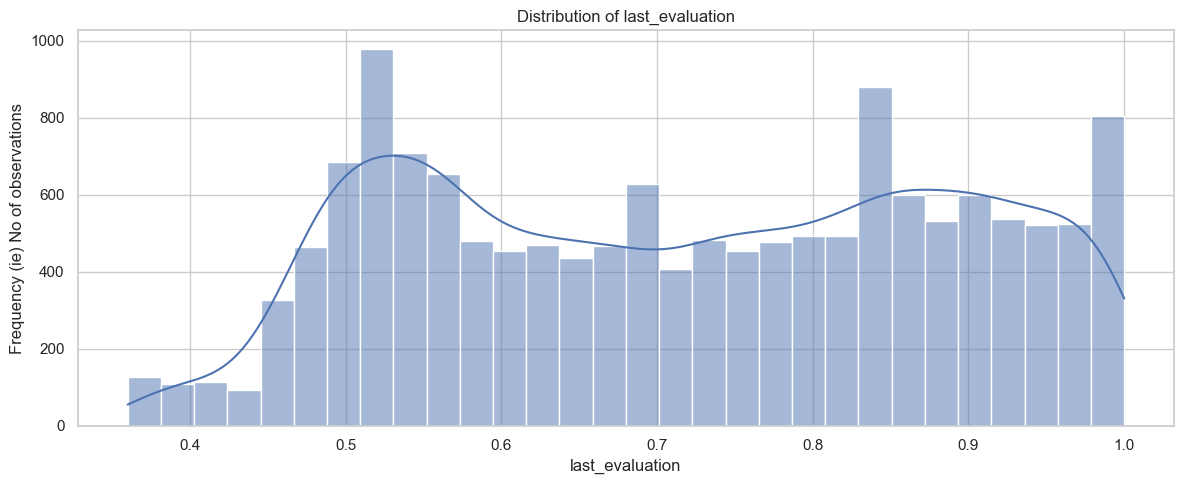

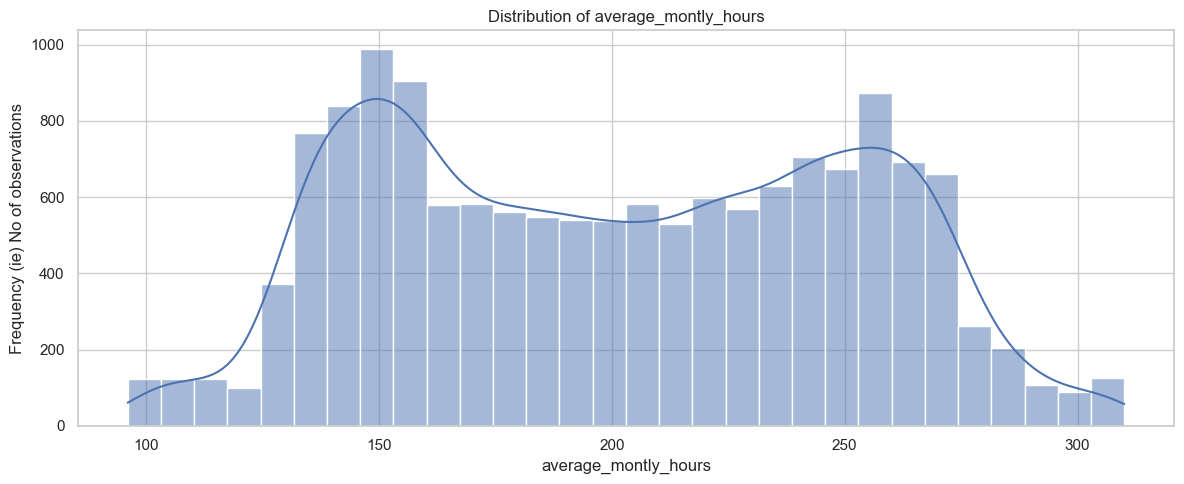

In [117]:
# #### 2.2a: distribution plot of 
# - Employee Satisfaction (use column satisfaction_level)
# - Employee Evaluation (use column last_evaluation)
# - Employee Average Monthly Hours (use column average_montly_hours)

distn_df = df[['satisfaction_level','last_evaluation','average_montly_hours']]

# Set style
sns.set(style="whitegrid")

for col in distn_df:
    plt.figure(figsize=(12,5))
    sns.histplot(data =distn_df, x = col, kde=True, bins=30) 
    # Blue line (KDE): A smoothed estimate of the distribution (helps visualize trends)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency (ie) No of observations')
    plt.tight_layout()
    plt.show()

#### Key Observations and Inferences
1. From distribution of satisfaction_level
    - There is a significant spike at very low satisfaction (around 0.1), indicating that there is a large group of people were extremely dissatisfied.
    - U-Shaped Dip in Mid-range (~0.3–0.4), shows employee falling into the moderate dissatisfaction(either very unhappy or somewhat happy) range
    - Steady Increase from ~0.4 to ~0.8, shows a broad rise in population with increasing satisfaction.
    - Small Dip after ~0.8, then a Slight Rise Near 1.0, Fewer employees at extreme satisfaction levels (close to 1.0),

    Business Interpretation:
    The company Portobello Tech likely has two polarized satisfaction groups:
     a. Very dissatisfied group (may correlate with high turnover or complaints).
     b. Satisfied group (could be stable employees)
    Suggestion: Need for retention strategies targeting low-satisfaction employees

2. From distribution of employee last_evaluation:
    - Two Peaks — a bimodal distribution, first Peak: Around 0.55, Second Peak: Around 0.85–1.0, and majority of employees receive average evaluations. A significant group receives very high evaluations, possibly high performers or recently evaluated.
    - Very few employees scored below 0.45, which infers that poor performers are rare, or are already filtered out (may be terminated)
    - slight valley between 0.6 and 0.8 Mid-to-high performers are relatively fewer
    - Spike near 1.0 : Notably high number of employees with a perfect or near-perfect evaluation.
    
    Business Interpretation:
    Employees with very high evaluations and low satisfaction may leave (feeling overworked or underappreciated).Average or low evaluated employees might also churn due to disengagement or management actions.

3. From distribution of average_montly_hours:
    - Bimodal Distribution:
        - First Peak (around 150 hours/month): A large group of employees work relatively fewer hours (around 150).
        - Second Peak (around 255 hours/month): Another large group works significantly more hours
    - Mid-range (around 180–220 hours) has a dip. So there may be two distinct working hour patterns in the organization (e.g: standard vs. overtime-heavy departments or roles).
    - A few employees work extremely high hours (> 280) (Potential signs of overwork, burnout, or critical resource dependency) and very few employees work below ~100 hours/month (part-time roles).
    Business Interpretation:
    The bimodal nature might indicate: Two job types (e.g:  operational vs. support staff). Different team workloads or expectations or imbalance work distribution.
        - Employees with very high hours but low satisfaction likely to leave.
        - Employees with low hours and low evaluations might also be at risk

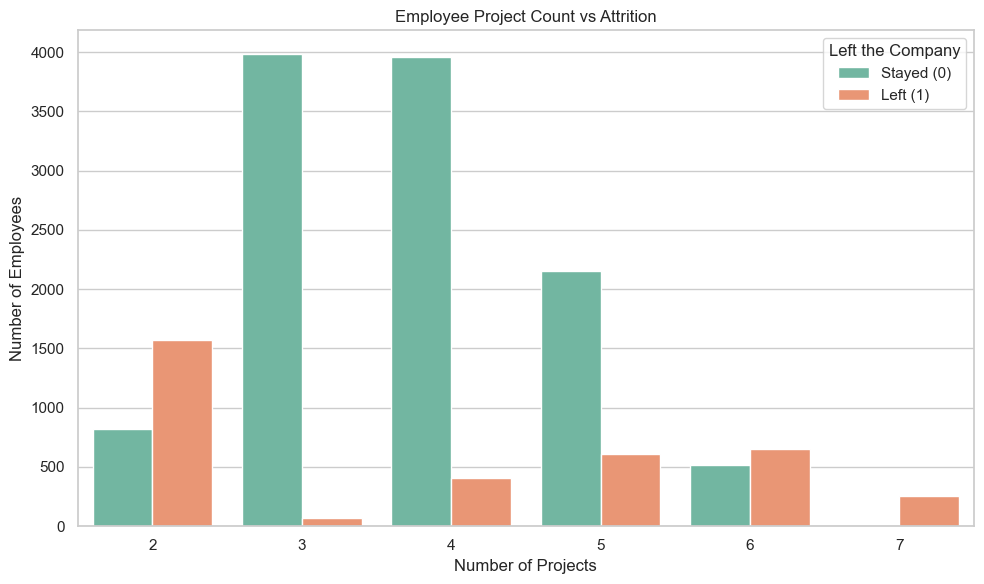

In [118]:
# Bar plot of the employee project count of both employees who left and 
# stayed in the organization (use column number_project and hue column left),
#  and inferences from the plot.

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='number_project', hue='left', palette='Set2')

plt.title('Employee Project Count vs Attrition')
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.legend(title='Left the Company', labels=['Stayed (0)', 'Left (1)'])
plt.tight_layout()
plt.show()


#### Inferences:
- left = 0 then  Employee stayed
- left = 1 then  Employee left
- 2 to 4 projects: Indicates a healthy, balanced workload. These employees are likely satisfied and not overwhelmed;A very large number of employees stayed (left = 0) when assigned 3 or 4 projects(stable employees). Only a small number left, indicating these project counts offer a balanced workload.
- 6 to 7 projects: Suggests burnout due to overload. High project count increases attrition risk. more employees left than stayed, especially noticeable at 6
- At 5 projects, the attrition rate starts to rise

#### Step 3: Perform clustering of employees who left based on their satisfaction and evaluation.
- 3.1.Choose columns satisfaction_level, last_evaluation, and left.
- 3.2.Do K-means clustering of employees who left the company into 3 clusters?
- 3.3.Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.

In [119]:
# 3.1. Choose columns satisfaction_level, last_evaluation, and left.

# Filter only employees who left (left = 1)
left_df = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]

In [120]:
# Perform K-Means clustering (k=3)
# Do K-means clustering of employees who left the company into 3 clusters
# Fit KMeans
# from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
left_df['cluster'] = kmeans.fit_predict(left_df)
left_df['cluster'] 

0        0
1        1
2        2
3        1
4        0
        ..
14994    0
14995    0
14996    0
14997    2
14998    0
Name: cluster, Length: 3571, dtype: int32

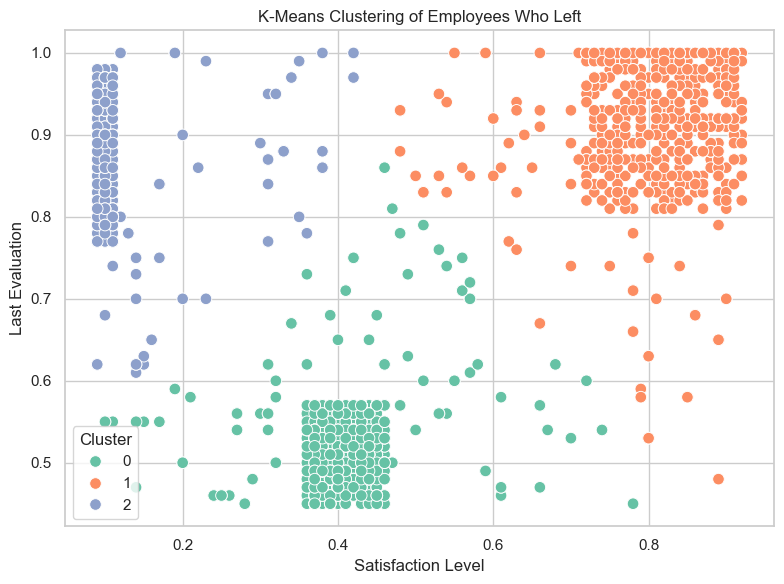

In [121]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=left_df,
    x='satisfaction_level',
    y='last_evaluation',
    hue='cluster',
    palette='Set2',
    s=70
)
plt.title("K-Means Clustering of Employees Who Left")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

Inferences:
1. Cluster 1 (Orange dots)
    - These employees were high performers with high satisfaction, but they left, due to burnout, lack of recognition, or external offers (e.g., better salary, growth).This is an alarming group, as losing top talent is costly
    -  retention strategies, like promotions, equity, recognition, Performance-based rewards and Leadership opportunities can boost them to stay.
2. Cluster 0 (Green dots)
    - likely disengaged or dissatisfied with job role, left due to lack of motivation, stagnation, or cultural mismatch
3. Cluster 2 (Blue dots)
    - Despite good performance employees may have left due to toxic culture, poor leadership, or no work-life balance

#### Step 4: Handle the left Class Imbalance using the SMOTE technique.
- 4.1. Pre-process the data by converting categorical columns to numerical columns by:
    - Separating categorical variables and numeric variables
    - Applying get_dummies() to the categorical variables
    - Combining categorical variables and numeric variables
- 4.2. Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
- 4.3. Upsample the train dataset using the SMOTE technique from the imblearn module.

In [122]:
# 4.1. Pre-process the data by converting categorical columns to numerical columns by:
# - Separating categorical variables and numeric variables
# - Applying get_dummies() to the categorical variables
# - Combining categorical variables and numeric variables


# 4.1 Load and Separate Features
# Separate features and target
X = df.drop("left", axis=1)
y = df["left"]


In [123]:
#  4.1 Separate Categorical and Numerical Columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(exclude=['object', 'category']).columns


In [124]:
# 4.1 Apply One-Hot Encoding (get_dummies) to Categorical Columns
X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)
X_num = X[numerical_cols]

# Combine both categorical variables and numeric variables
X_processed = pd.concat([X_num, X_cat], axis=1)


In [125]:
# 4.1 Apply SMOTE to Balance the Classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

# Check new class distribution
print("Original class distribution:\n", y.value_counts())
print("\nAfter SMOTE:\n", pd.Series(y_resampled).value_counts())


Original class distribution:
 left
0    11428
1     3571
Name: count, dtype: int64

After SMOTE:
 left
1    11428
0    11428
Name: count, dtype: int64


In [126]:
# stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.
# It ensures that both training and test sets have the same class proportions as the original dataset.
# Important for imbalanced classification problems like attrition (left column).

# X_processed = final feature matrix (numerical + encoded categorical)
# y = original target (before SMOTE)
#  Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,                 # or use X_resampled, y_resampled if post-SMOTE
    test_size=0.2,                  # 80:20 split
    random_state=123,
    stratify=y                      # Ensures class balance is preserved
)

# Check distribution
print("Train class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))

Train class distribution:
 left
0    0.761897
1    0.238103
Name: proportion, dtype: float64

Test class distribution:
 left
0    0.762
1    0.238
Name: proportion, dtype: float64


In [127]:
# next step is to apply SMOTE only to the training data to handle class imbalance properly. 
# Apply SMOTE on the training data
# Apply SMOTE to training set only
smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Confirm class balance after SMOTE
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())


Before SMOTE: left
0    9142
1    2857
Name: count, dtype: int64
After SMOTE: left
0    9142
1    9142
Name: count, dtype: int64


#### Step 5: Perform 5-fold cross-validation model training and evaluate performance
- 5.1.Train a logistic regression model, apply a 5-fold CV, and plot the classification report.
- 5.2.Train a Random Forest Classifier model, apply the 5-fold CV, and plot the classification report.
- 5.3.Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report.


 Evaluating: Logistic Regression
              precision    recall  f1-score   support

      Stayed       0.81      0.77      0.79      9142
        Left       0.78      0.82      0.80      9142

    accuracy                           0.80     18284
   macro avg       0.80      0.80      0.80     18284
weighted avg       0.80      0.80      0.80     18284



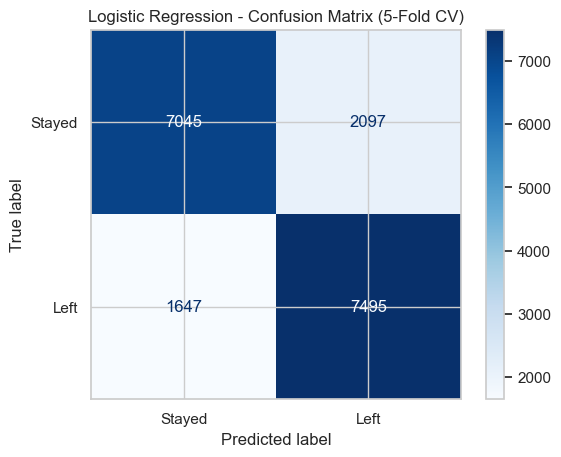


 Evaluating: Random Forest
              precision    recall  f1-score   support

      Stayed       0.98      1.00      0.99      9142
        Left       1.00      0.97      0.98      9142

    accuracy                           0.99     18284
   macro avg       0.99      0.99      0.99     18284
weighted avg       0.99      0.99      0.99     18284



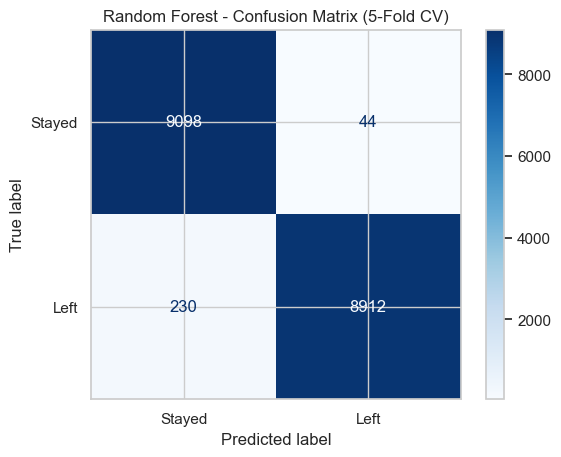


 Evaluating: Gradient Boosting
              precision    recall  f1-score   support

      Stayed       0.95      0.98      0.96      9142
        Left       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



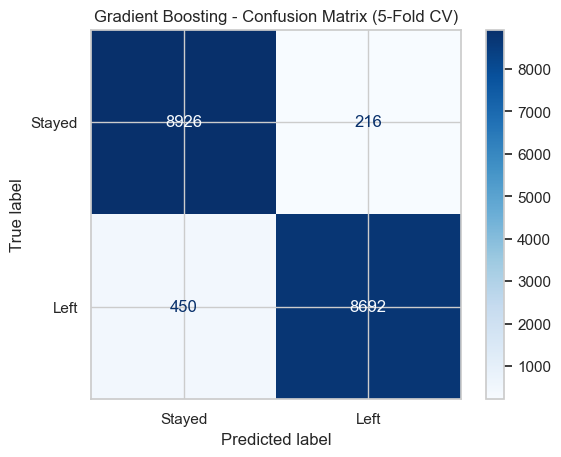

In [128]:
# Define 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Store models in a list
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}

# Function to plot classification report from predictions
def evaluate_model(name, model, X, y):
    print(f"\n Evaluating: {name}")
    
    # Get cross-validated predictions
    y_pred = cross_val_predict(model, X, y, cv=cv)
    
    # Print classification report
    report = classification_report(y, y_pred, target_names=["Stayed", "Left"])
    print(report)
    
    # Plot confusion matrix
    ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=["Stayed", "Left"], cmap="Blues")
    plt.title(f"{name} - Confusion Matrix (5-Fold CV)")
    plt.show()

# Run for each model
for name, model in models.items():
    evaluate_model(name, model, X_train_resampled, y_train_resampled)

Precision (Positive Predictive Value) = TP / (TP + FP)
How many predicted leavers actually left?

Recall (Sensitivity / True Positive Rate) = TP / (TP + FN)
How many actual leavers did we correctly predict?

In Business sense, Recall is more important than Precision.

False Negatives (FN) = Employees who were about to leave but weren't flagged.These are missed opportunities for retention.Business suffers if valuable talent exits unexpectedly.

False Positives (FP) = Employees wrongly flagged as likely to leave. Costs HR a bit of extra attention, but far less harmful.


1. Logistic Regression – Confusion Matrix
- High false positives (2097 stayed employees,  predicted as left) and high false negatives (1647 left employees predicted as stayed),  lacks sufficient accuracy leading to missed retention opportunities. Many valuable employees who left were not identified (1647 false negatives)
2. Random Forest – Confusion Matrix 
- Very low false positives (44) and very low false negatives (230). excellent in classifying both classes. HR can confidently target the predicted leavers (8912) for retention interventions.
3. Gradient Boosting – Confusion Matrix
- Slightly more false positives (216) and false negatives (450) than Random Forest, but still very strong

Recommendations:
- Random Forest -Recommended model for employee attrition prediction.(High precision and recall, Low false alarms, Strong handling of class imbalance)
- Use Gradient Boosting as a second opinion model 
- Avoid using Logistic Regression in isolation, as it may fail to flag important leavers and cause unnecessary HR actions.

Step 6.Identify the best model and justify the evaluation metrics used.
- 6.1.Find the ROC/AUC for each model and plot the ROC curve.
- 6.2.Find the confusion matrix for each of the models.
- 6.3.Explain which metric needs to be used from the confusion matrix: Recall or Precision?

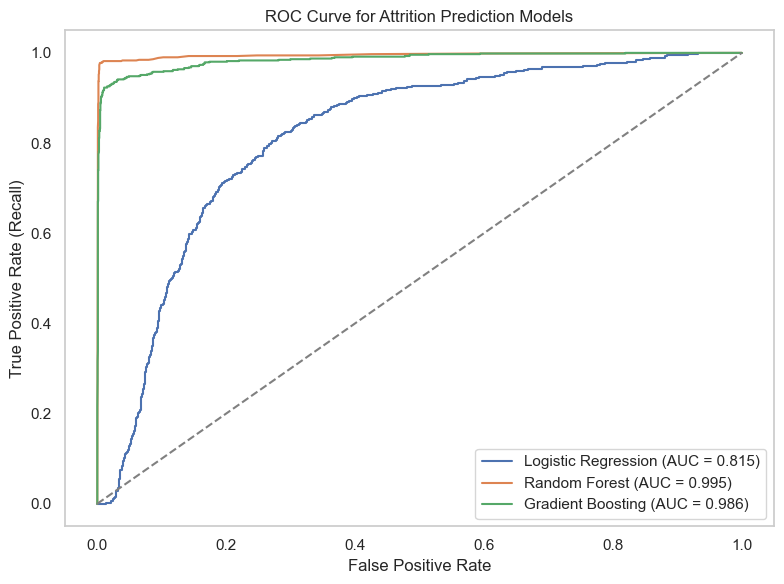

In [129]:
# Define models again
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=123),
    "Random Forest": RandomForestClassifier(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123)
}

# Plot ROC Curves
plt.figure(figsize=(8, 6))

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class '1' (left)
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Reference line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve for Attrition Prediction Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

The ROC curve plots the True Positive Rate (Recall) vs. False Positive Rate, and the AUC (Area Under Curve) reflects the model's ability to distinguish between the classes.
Best AUC: Random Forest (closer to 1)
In Employee Attrition Prediction, Recall is more important than Precision.
Best Model: Random Forest Classifier

7.Suggest various retention strategies for targeted employees.
- 7.1. Using the best model, predict the probability of employee turnover in the test data.
- 7.2.Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
    - Safe Zone (Green) (Score < 20%)
    - Low-Risk Zone (Yellow) (20% < Score < 60%)
    - Medium-Risk Zone (Orange) (60% < Score < 90%)
    - High-Risk Zone (Red) (Score > 90%).

In [130]:
# 7.1 Predict the Probability of Employee Turnover on Test Data
from sklearn.ensemble import RandomForestClassifier

# 1. Train Random Forest on balanced training data
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train_resampled, y_train_resampled)

# 2. Predict probabilities on the original test set
turnover_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of 'left' (class 1)

# 3. Convert to DataFrame for inspection
turnover_predictions = pd.DataFrame({
    'Turnover_Probability': turnover_prob,
    'Actual_Left': y_test.reset_index(drop=True)
})

# 4. View top employees at risk
high_risk = turnover_predictions.sort_values(by='Turnover_Probability', ascending=False)
print(high_risk.head(10))


      Turnover_Probability  Actual_Left
1500                   1.0            1
1324                   1.0            1
1203                   1.0            1
1205                   1.0            1
1210                   1.0            1
1213                   1.0            1
1221                   1.0            1
1222                   1.0            1
1224                   1.0            1
1236                   1.0            1


In [131]:
# Based on the probability score range below, categorize the employees into four zones and
# suggest your thoughts on the retention strategies for each zone.

def assign_risk_zone(prob):
    if prob < 0.2:
        return "Safe Zone (Green)"
    elif prob < 0.6:
        return "Low-Risk Zone (Yellow)"
    elif prob < 0.9:
        return "Medium-Risk Zone (Orange)"
    else:
        return "High-Risk Zone (Red)"

# Apply to prediction DataFrame
turnover_predictions["Risk_Zone"] = turnover_predictions["Turnover_Probability"].apply(assign_risk_zone)

# Count of employees in each zone
print(turnover_predictions["Risk_Zone"].value_counts())


Risk_Zone
Safe Zone (Green)            2174
High-Risk Zone (Red)          649
Low-Risk Zone (Yellow)        122
Medium-Risk Zone (Orange)      55
Name: count, dtype: int64


Risk Zone Summary:
- Safe Zone (Green)	, Employee Count: 2174	Majority are stable and unlikely to leave.
- Low-Risk Zone (Yellow), Employee Count: 122	Mild attention needed; may turn risky under poor conditions.
- Medium-Risk (Orange), Employee Count: 55	Elevated risk group—needs HR review.


7.Suggest various retention strategies for targeted employees.
- 7.1. Using the best model, predict the probability of employee turnover in the test data.
- 7.2.Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.
    - Safe Zone (Green) (Score < 20%)
    - Low-Risk Zone (Yellow) (20% < Score < 60%)
    - Medium-Risk Zone (Orange) (60% < Score < 90%)
    - High-Risk Zone (Red) (Score > 90%).